In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [5]:
data = pd.read_csv('data.csv')
data

,x1,x2
0,-6.111197,1.471531
1,-7.496654,0.913425
2,-10.844898,-7.553523
3,-4.543377,-2.135686
4,-1.913821,-0.034780
...,...,...
1495,-8.527192,-6.726876
1496,-3.271435,2.243791
1497,1.649903,-0.201178
1498,0.792307,0.608689


In [34]:
data.shape

(1500, 2)

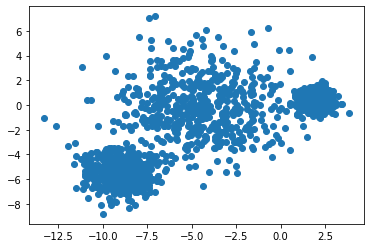

In [6]:
X = data[["x1", "x2"]].values

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

In [43]:
n = data.shape[0] #Dữ liệu trong data.csv
features = data.shape[1] #Số features trong data.csv
k = 3 #Số cụm muốn phân bố
print('n: ',n,'\nfeatures: ',features)

n:  1500 
features:  2


# K-Means Clustering
- Init centers
- While not converged:
  - Update cluster membership
  - Update centers

In [73]:
#init centers
centers = X[np.random.choice(n, k, replace=False)]
centers

array([[-0.83194478, -2.06550227],
       [-4.65150874,  2.27343902],
       [-7.48134753, -1.19351595]])

In [74]:
 ((X[0] - centers[0])**2).sum()**0.5

6.354613114270106

In [75]:
((X - centers[0])**2).sum(axis = 1)

array([ 40.38110783,  53.29235206, 130.37760815, ...,   9.63527604,
         9.78949085,  12.90740201])

In [76]:
((X.reshape(n,1,features) - centers.reshape(1,k,features))**2).sum(axis=2)**0.5

array([[ 6.35461311,  1.66545715,  2.99662896],
       [ 7.3001611 ,  3.1534881 ,  2.10699665],
       [11.41830146, 11.61581906,  7.19466194],
       ...,
       [ 3.1040741 ,  6.76989839,  9.18501383],
       [ 3.12881621,  5.69267236,  8.46766172],
       [ 3.5926873 ,  6.86761762,  9.50437415]])

In [77]:
distances = np.zeros((n,k))
for i in range(k):
  distances[:,i] = ((X - centers[i])**2).sum(axis = 1)**0.5

distances

array([[ 6.35461311,  1.66545715,  2.99662896],
       [ 7.3001611 ,  3.1534881 ,  2.10699665],
       [11.41830146, 11.61581906,  7.19466194],
       ...,
       [ 3.1040741 ,  6.76989839,  9.18501383],
       [ 3.12881621,  5.69267236,  8.46766172],
       [ 3.5926873 ,  6.86761762,  9.50437415]])

In [78]:
closest = np.argmin(distances, axis=1)

In [79]:
X[closest == 0].mean(axis=0)

array([1.07722254, 0.01471453])

In [80]:
for i in range(k):
  centers[i, :] = X[closest == i].mean(axis = 0)

centers

array([[ 1.07722254,  0.01471453],
       [-4.2921797 ,  2.03989023],
       [-8.38425965, -4.39693885]])

In [88]:
def Kmeans(X,k):
  n = X.shape[0]
  centers = X[np.random.choice(n, k, replace=False)]
  closest = np.zeros(n).astype(int)

  while True:
    old_closest = closest.copy()
    distances = cdist(X,centers)
    closest = np.argmin(distances, axis=1)

    for i in range(k):
      centers[i, :] = X[closest == i].mean(axis = 0)

    if all(closest == old_closest):
      break

  return closest, centers

In [89]:
labels, centers = Kmeans(X,3)
print(labels)
print(centers)

[0 0 2 ... 1 1 1]
[[-4.90914469  0.11313436]
 [ 1.6400471   0.44241664]
 [-8.87177269 -5.36630437]]


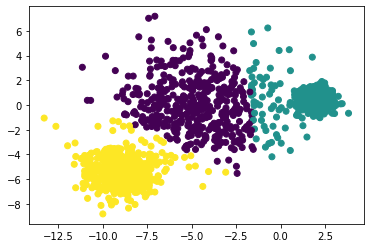

In [90]:
plt.scatter(X[:,0],X[:,1],c=labels)